# The Battle of Neighborhoods
## IBM Data Science Professional Certificate Capstone
### By, Aaron LS
01 Jun 2020

## 0. Prerequisites

This section contains commonly used libraries, APIs and useful tools to perform data science work. **# Comment out, uncomment in, as required!**

### 0.1 Libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

!conda install -c anaconda xlrd --yes

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

### 0.2 APIs

#### 0.2.1 Foursquare

In [2]:
CLIENT_ID = 'SW0RVL42XATVYS3YNDLU00ZMEJOHANVTO1DDQNUZMNULDBW1' # your Foursquare ID
CLIENT_SECRET = '0VNNWBROR5MH54S2UUJ1NQRP33YSLZP5TQX3EJAEVIBHPJE1' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SW0RVL42XATVYS3YNDLU00ZMEJOHANVTO1DDQNUZMNULDBW1
CLIENT_SECRET:0VNNWBROR5MH54S2UUJ1NQRP33YSLZP5TQX3EJAEVIBHPJE1


#### 0.2.2 Zoopla

In [3]:
#pip install zoopla
#pip install -r requirements.txt # Install the dev requirements
#ZOOPKEY = 'XXX' # your Zoopla API Key
#py.test --api_key=ZOOPKEY tests/ # pytest under Python 3+ // Run py.test with your developer key (otherwise you won’t be able to hit the live API upon which these tests depend).

### 0.3 Web Crawlers and Scrapers

In [4]:
!pip install lxml # lxml is a Python library which allows for easy handling of XML and HTML files, and can also be used for web scraping.

# Beautiful Soup
#!conda install -c conda-forge beautifulsoup4 --yes
#from bs4 import BeautifulSoup

# Rightmove Webscraper
#!pip install -U rightmove-webscraper
#from rightmove_webscraper import RightmoveData
#rm_url = "XXX" # search Rightmove for desired properties/locations and paste URL here
#rm = RightmoveData(rm_url)

     |████████████████████████████████| 5.5MB 5.7MB/s eta 0:00:01     |██▍                             | 419kB 5.7MB/s eta 0:00:01     |█████████████████▊              | 3.1MB 5.7MB/s eta 0:00:01██████▋  | 5.1MB 5.7MB/s eta 0:00:01


## 1. Introduction

### 1.1 Background

#### "UK restaurant market facing fastest decline in seven years"

A headline from last year [i] prior to the coronavirus. 

MCA’s UK Restaurant Market Report 2019 [ii] indicated that "*large falls in the sales value and outlet volumes of independent restaurants is the cause of the overall decline of the UK restaurant market. It attributes this to a “perfect storm” of rising costs, over-supply, and weakening consumer demand.*"

London's restaurant scene changes week on week, with openings and closures happening on a regular basis; it must be hard to keep up. The hyper-competitiveness of London's restaurant scene make it one of the toughest cities in the world to launch a new venture.

> "*With business rates up and footfall down, a winning formula is worth its weight in gold and although first-rate food is inevitably the focus, other factors can also affect a restaurant's success. Atmosphere is frequently cited in customer surveys as second only to food in an enjoyable restaurant visit and getting the vibe right is crucial.*" [iii]

Due to the coronavirus most businesses have suffered even greater losses. As restrictions lift businesses will be looking for ways to make up for lost time and earnings. Reopening a restaurant once lockdown is over is one thing, but knowing what to put on the menu if you haven't been in contact with a punter in months is another. 

> "*Are there any grounds for hope? A wild optimist might point to some encouraging data about the overperformance of small chains while everyone else loses their shirts; a realist might make coughing noises about small sample sizes and growth from a low base. The queues snaking out of Soho’s recently opened Pastaio suggest one genuinely viable route to salvation – concepts may need to follow its lead and amp up the comfort food factor while dialling down prices.  
> And while home delivery is a source of confidence for some parties (Deliveroo, for instance, recently listed its shares on the stock market) it may well end up a false friend: the increased volume of so-called “dark kitchens” presage a sinister vision of the future, where restaurants don’t exist to serve customers onsite at all, but just pump out takeaway meals for us to consume on our sofas. A little far-fetched, perhaps, but with lights going out at a faster rate than many can remember, it can’t be too long before whole tranches of the market do indeed go dark, one way or another.*" [iv]

[i] https://www.bighospitality.co.uk/Article/2019/09/24/UK-restaurant-market-facing-fastest-decline-in-seven-years-according-to-MCA-Insight  
[ii] https://www.mca-insight.com/market-reports/uk-restaurant-market-report-2019/597394.article  
[iii] https://www.standard.co.uk/go/london/restaurants/how-londons-top-restaurants-soundtrack-their-spaces-a3737991.html  
[iv] https://www.theguardian.com/global/2017/nov/26/who-killed-londons-restaurant-scene  

### 1.2 Business problem

The task is to identify a new, on trend hospitality business opportunity in a thriving location in London. However, with the country currently under lockdown it is much harder to understand what types of food and drink businesses are popular. A novel method will need to be deployed to analyse the current situation with food businesses in London during the coronavirus. 

The project originally planned to use foot traffic data at different times to identify what food venues appear to be trending and where. However, given that the whole country is under lockdown due to the Coronavirus there is no trending data to analyse. 

Another flawed idea would be to assume whatever food venues are most common are most in demand/popular. This is not ideal since it would be using data too set in the past (it takes time to build a restaurant) and trends move more quickly. This method would not provide near-real-time visibility of what is actually trending to make more accurate predictions, ahead of the curve. In other words, market trends and tastes change all the time and whatever shows up using the mode of venue results is only what was popular months prior. **Note:** This is true of this method, regardless of lockdown!

Instead, data that might contribute to determining restaurant improvements might include performance metrics during lockdown; hours, venue likes, volume of recommendations, quality of recommendations, content of recommendations (word densities), as well as clusters of food businesses that remained operational during lockdown. This project aims to predict pandemic proof food enterprises and what the industry might look like after restrictions are lifted.


### 1.3 Interest

Obviously, any restauranteur or leisure and hospitality entrepreneur/enterprise would be very interested in accurate prediction of food trend data for competitive advantage and added business value. These such data could be used to inform new menu creation or concepts for new boutique restaurants or street food vendor pop-ups - proving valuable to food and retail parks, such as Boxpark.

### 1.4 Desired outcome

The ideal outcome of this notebook would be to:
- Create a dataframe of London districts, postcode centroids, and coordinates
- Identify the top 5 (most common) food venues by cuisine
- Plot all food venues to map
- Use venue Hours Endpoint of FS API to see what venues are still operating during lockdown
- Create word clouds of venue Tips using Foursquare API to identify trending menu items. Since the Foursquare trending feature won't return any results at this time due to the coronavirus lockdown, I will use the Tips Endpoint in the Foursquare API to try and identify patterns in the reviews i.e. what menu items get the most positive mentions (**Note:** This may require the use of sentiment analysis, which is out of scope for this notebook)
- Use choropleth maps to highlight food vendor densities per London district by different cuisines (optional: choropleth map by density of venues open during lockdown)
- Use k-means clustering to cluster food venues in London to identify restaurant hotspots and prime locations as suggestions for the client (optional: cluster by venues open during lockdown)
- Map commercial venues that are available to rent using either Zoopla API or Rightmove webscraper 
- List suitable commercial venues for further analysis



## 2. Data Acquisition and Cleaning

### 2.1 Data sources

To explore the problem we can use the data listed below:

- Wikipedia pages for London Boroughs **[1]** to get an initial high-level view of what we are working with.
- For cross-referencing postcodes with districts and longitudes and latitudes I will use a combination of the Office for National Statistics **[2]** and London Datastore **[3]**. I also checked “A Guide to ONS Geography Postcode Products” **[4]** to make sure I was using the correct postcode system for statistics (NSPL).
- I found the Second-level Administrative Divisions of the United Kingdome from NYU Spatial Data Repository **[5]**. The .json file **[6]** has coordinates and boundaries of the all the cities of the UK. This will be cleaned and reduced to London where I will use it to create a choropleth map of food vendor densities for different cuisines using the Foursquare API.
- Forsquare API **[7]** will be used to get the most common food venues of London. **Note:** This may be reduced further to City of London and Westminster (or just EC and WC postcodes) to reduce the number of API calls. The FS API's hours and tips Endpoints [8] will be used to get venue operating hours (to see which venues are still operating during lockdown) and to get user recommendations, which will be used for word clouds to try and identify trending menu items.
- I will then use either Zoopla API **[9][10]** or Rightmove webscraper **[11]** to pull in commercial properties on the market as options for the client.

[1] https://en.m.wikipedia.org/wiki/List_of_London_boroughs  
[2] https://geoportal.statistics.gov.uk/datasets/national-statistics-postcode-lookup-may-2020  
[3] https://data.london.gov.uk/london-area-profiles/  
[4] https://www.ons.gov.uk/methodology/geography/geographicalproducts/postcodeproducts   
[5] https://geo.nyu.edu/catalog/stanford-wj438mh2295  
[6] https://earthworks.stanford.edu/download/file/stanford-wj438mh2295-geojson.json  
[7] https://developer.foursquare.com/  
[8] https://developer.foursquare.com/docs/places-api/endpoints/   
[9] https://developer.zoopla.co.uk/  
[10] https://github.com/AnthonyBloomer/zoopla  
[11] https://github.com/toby-p/rightmove_webscraper.py

## 3. Methodology 

### 3.1 Exploratory data analysis

#### 3.1.1 Tranform the data into a *pandas* dataframe and explore data

London has a total of 32 boroughs and the City of London and 533 sub-districts/areas/neighborhoods (too many to explore in this study). In order to segement the neighborhoods and explore them, we will London Boroughs Dataframe that contains the 32 boroughs as well as the the latitude and logitude coordinates of each borough. **Note:** Postcodes are irrelevant here, since there are many postcodes within each of these boroughs and we already have the coordinates. If we did not have the coordinates already, we could perform analysis to find the centroids of each cluster of postcodes belonging to each borough.

In [61]:
df = pd.read_csv('London Boroughs Dataframe.csv')
df['Latitude'] = pd.to_numeric(df['Latitude']) #convert lat to float
df['Longitude'] = pd.to_numeric(df['Longitude']) #convert long to float
print(df.dtypes)
df.head(11)

Borough       object
Latitude     float64
Longitude    float64
dtype: object


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,-0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,-0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,-0.0198
5,Camden,51.5290,-0.1255
6,City of London,51.5155,-0.0922
7,Croydon,51.3714,-0.0977
8,Ealing,51.5130,-0.3089
9,Enfield,51.6538,-0.0799


#### 3.1.2 Mapping London with Boroughs Markers using Folium

First get the location of London and generate the bare map.

In [62]:
address = 'London, UK'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of London are 51.5073219, -0.1276474.


In [63]:
map_lnd = folium.Map(location=[latitude, longitude], zoom_start=10)

map_lnd

Next add the markers for the Boroughs.

In [64]:
# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lnd)
        
map_lnd

#### 3.3.3 Exploring and Mapping the Venues in the London Boroughs

Now we're going to start utilising the Foursquare API to explore the neighborhoods and segment them.

In [60]:
radius = 2000
LIMIT = 200

def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

                # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
lnd_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

print(lnd_venues.shape)
lnd_venues.head(21)

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
City of London
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
(1427, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,-0.1557,Parliament Hill,51.559661,-0.159639,Scenic Lookout
1,Barking and Dagenham,51.5607,-0.1557,Parliament Hill Farmers’ Market,51.559420,-0.151418,Farmers Market
2,Barking and Dagenham,51.5607,-0.1557,Bistro Laz,51.561333,-0.150528,Mediterranean Restaurant
3,Barking and Dagenham,51.5607,-0.1557,GAIL's Bakery,51.561942,-0.149528,Bakery
4,Barking and Dagenham,51.5607,-0.1557,Parliament Hill Fields Playground,51.556653,-0.157296,Playground
5,Barking and Dagenham,51.5607,-0.1557,Al Parco,51.561356,-0.150680,Italian Restaurant
6,Barking and Dagenham,51.5607,-0.1557,Carob Tree,51.561377,-0.150580,Mediterranean Restaurant
7,Barking and Dagenham,51.5607,-0.1557,Forks & Corks,51.561899,-0.150116,Food
8,Barking and Dagenham,51.5607,-0.1557,Parliament Hill Café,51.559242,-0.152850,Café
9,Barking and Dagenham,51.5607,-0.1557,Kalendar,51.561890,-0.149737,Café


In [12]:
lnd_venues['Venue Category'].unique()

array(['Scenic Lookout', 'Farmers Market', 'Mediterranean Restaurant',
       'Bakery', 'Playground', 'Italian Restaurant', 'Food', 'Café',
       'Lake', 'Tennis Court', 'Track Stadium', 'Trail', 'Home Service',
       'Bus Stop', 'Construction & Landscaping', 'Park', 'Fish Market',
       'Plaza', 'Historic Site', 'Pub', 'Caucasian Restaurant',
       'Breakfast Spot', 'Pizza Place', 'Fish & Chips Shop', 'Wine Shop',
       'Grocery Store', 'Supermarket', 'Hotel', 'Indian Restaurant',
       'Bar', 'Coffee Shop', 'Mexican Restaurant', 'Outdoor Sculpture',
       'Stadium', 'Chocolate Shop', 'Multiplex', 'Restaurant',
       'Sporting Goods Shop', 'Clothing Store', 'Food Court',
       'Music Venue', 'Bistro', 'Roof Deck', 'Latin American Restaurant',
       'Outlet Mall', 'Sandwich Place', 'Asian Restaurant',
       'Gym / Fitness Center', 'Ice Cream Shop', 'Hotel Bar',
       'Burger Joint', 'American Restaurant', 'Brazilian Restaurant',
       'Bubble Tea Shop', 'Sports Bar', 'Outl

***We are only interested in Restaurants, so we will extract any venue with the word 'Restaurant' attached.***

In [13]:
rests = list(lnd_venues['Venue Category'].unique())
lnd_rests = []
for x in rests:
    if "Restaurant" in x:
        lnd_rests.append(x)
        
lnd_rests

['Mediterranean Restaurant',
 'Italian Restaurant',
 'Caucasian Restaurant',
 'Indian Restaurant',
 'Mexican Restaurant',
 'Restaurant',
 'Latin American Restaurant',
 'Asian Restaurant',
 'American Restaurant',
 'Brazilian Restaurant',
 'English Restaurant',
 'Thai Restaurant',
 'Seafood Restaurant',
 'Turkish Restaurant',
 'Sushi Restaurant',
 'Modern European Restaurant',
 'Malay Restaurant',
 'Greek Restaurant',
 'Portuguese Restaurant',
 'Szechuan Restaurant',
 'Vietnamese Restaurant',
 'New American Restaurant',
 'French Restaurant',
 'Falafel Restaurant',
 'Scandinavian Restaurant',
 'Udon Restaurant',
 'Dim Sum Restaurant',
 'Spanish Restaurant',
 'Caribbean Restaurant',
 'Korean Restaurant',
 'Ramen Restaurant',
 'Southern / Soul Food Restaurant',
 'Polish Restaurant',
 'Persian Restaurant',
 'Fast Food Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Japanese Restaurant',
 'Tapas Restaurant',
 'Chinese Restaurant',
 'Indian Chinese Restaurant',
 'Middle Eastern Restaurant',
 

Now lets pop those back into the lnd_venues dataframe as lnd_venues_new dataframe.

In [14]:
lnd_venues_new = lnd_venues[lnd_venues['Venue Category'].isin(lnd_rests)].reset_index(drop=True)
print(lnd_venues_new.shape)
lnd_venues_new.head(21)

(329, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,-0.1557,Bistro Laz,51.561333,-0.150528,Mediterranean Restaurant
1,Barking and Dagenham,51.5607,-0.1557,Al Parco,51.561356,-0.150680,Italian Restaurant
2,Barking and Dagenham,51.5607,-0.1557,Carob Tree,51.561377,-0.150580,Mediterranean Restaurant
3,Bexley,51.4549,-0.1505,The Georgian,51.452242,-0.147677,Caucasian Restaurant
4,Bexley,51.4549,-0.1505,La Baita,51.458228,-0.148801,Italian Restaurant
5,Bexley,51.4549,-0.1505,Chatkhara,51.452637,-0.147465,Indian Restaurant
6,Bexley,51.4549,-0.1505,El Chicos,51.453481,-0.145160,Mexican Restaurant
7,Brent,51.5588,-0.2817,Bobby Moore Club,51.557140,-0.279610,Restaurant
8,Brent,51.5588,-0.2817,Wembley Tandoori Restaurant,51.562063,-0.281572,Indian Restaurant
9,Brent,51.5588,-0.2817,Las Iguanas,51.556443,-0.283967,Latin American Restaurant


Lets see how many of each restaurant there are, shall we!?

In [15]:
lnd_venues_new.groupby('Venue Category').count().sort_values(by='Neighborhood', ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Italian Restaurant,53,53,53,53,53,53
Indian Restaurant,30,30,30,30,30,30
Restaurant,17,17,17,17,17,17
Sushi Restaurant,14,14,14,14,14,14
Portuguese Restaurant,14,14,14,14,14,14
Fast Food Restaurant,14,14,14,14,14,14
French Restaurant,13,13,13,13,13,13
Thai Restaurant,13,13,13,13,13,13
Vietnamese Restaurant,12,12,12,12,12,12


In [16]:
print('There are {} uniques restaurants in London.'.format(len(lnd_venues_new['Venue Category'].unique())))

There are 53 uniques restaurants in London.


### Let plop those food havens to our map of London!

In addition to our Borough markers we will now also want Venue - Venue Latitude - Venue Longitude - Venue Category from lnd_venues_new

In [17]:
# add markers to map
for lat, lng, rest in zip(lnd_venues_new['Venue Latitude'], lnd_venues_new['Venue Longitude'], lnd_venues_new['Venue Category']):
    label = '{}'.format(rest)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='lime',
        fill=True,
        fill_color='lime',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lnd)
    
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lnd)
        
map_lnd

Lets analyse each borough with dummy coding to discover each boroughs top restaurant category frequency, so that we can then begin clustering.

In [59]:
# one hot encoding
lnd_onehot = pd.get_dummies(lnd_venues_new[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lnd_onehot['Neighborhood'] = lnd_venues_new['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lnd_onehot.columns[-1]] + list(lnd_onehot.columns[:-1])
lnd_onehot = lnd_onehot[fixed_columns]

lnd_onehot.head(11)

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bexley,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Brent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Brent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Brent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
lnd_onehot.shape

(329, 54)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [20]:
lnd_grouped = lnd_onehot.groupby('Neighborhood').mean().reset_index()
lnd_grouped

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bexley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Brent,0.000000,0.153846,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.153846,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000
3,Camden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000
4,City of London,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.037037,0.000000,0.037037,0.037037,0.000000,0.111111,0.000000,0.000000,0.000000,0.074074,0.111111,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.074074,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.037037,0.074074,0.000000,0.000000,0.00,0.000000,0.037037,0.000000,0.000000,0.037037,0.000000,0.037037,0.000000,0.074074
5,Croydon,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.071429,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.00,0.071429,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000
6,

In [21]:
lnd_grouped.shape

(29, 54)

Let's print each neighborhood along with the top 10 most common venues with the freq distro.

In [22]:
num_top_venues = 10

for hood in lnd_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = lnd_grouped[lnd_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                        venue  freq
0    Mediterranean Restaurant  0.67
1          Italian Restaurant  0.33
2     Scandinavian Restaurant  0.00
3          Mexican Restaurant  0.00
4   Middle Eastern Restaurant  0.00
5  Modern European Restaurant  0.00
6     New American Restaurant  0.00
7      Okonomiyaki Restaurant  0.00
8          Persian Restaurant  0.00
9           Polish Restaurant  0.00


----Bexley----
                        venue  freq
0          Mexican Restaurant  0.25
1          Italian Restaurant  0.25
2           Indian Restaurant  0.25
3        Caucasian Restaurant  0.25
4     Scandinavian Restaurant  0.00
5   Middle Eastern Restaurant  0.00
6  Modern European Restaurant  0.00
7     New American Restaurant  0.00
8      Okonomiyaki Restaurant  0.00
9          Persian Restaurant  0.00


----Brent----
                       venue  freq
0          Indian Restaurant  0.15
1         Italian Restaurant  0.15
2        American Restaurant  0.15
3  Lat

### *Get that into a noice panda dataframe!*

In [58]:
# write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lnd_grouped['Neighborhood']

for ind in np.arange(lnd_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lnd_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Total,Mediterranean Restaurant,Italian Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant
1,Bexley,Total,Mexican Restaurant,Italian Restaurant,Indian Restaurant,Caucasian Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
2,Brent,Total,American Restaurant,Italian Restaurant,Indian Restaurant,Seafood Restaurant,English Restaurant,Restaurant,Latin American Restaurant,Brazilian Restaurant,Asian Restaurant
3,Camden,Total,Italian Restaurant,Restaurant,Turkish Restaurant,Indian Restaurant,Szechuan Restaurant,Sushi Restaurant,Malay Restaurant,Greek Restaurant,Modern European Restaurant
4,City of London,Total,Restaurant,French Restaurant,Italian Restaurant,Seafood Restaurant,Vietnamese Restaurant,Indian Restaurant,Modern European Restaurant,Sushi Restaurant,Latin American Restaurant
5,Croydon,Total,Portuguese Restaurant,Spanish Restaurant,Korean Restaurant,Indian Restaurant,Malay Restaurant,Mediterranean Restaurant,Greek Restaurant,Caribbean Restaurant,Restaurant
6,Ealing,Total,Vietnamese Restaurant,Italian Restaurant,Polish Restaurant,Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,English Restaurant,New American Restaurant
7,Enfield,Total,Turkish Restaurant,Italian Restaurant,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Chinese Restaurant
8,Greenwich,Total,Vietnamese Restaurant,English Restaurant,Korean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant
9,Hackney,Total,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Modern European Restaurant,Italian Restaurant,Ramen Restaurant,English Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant


## 3.2 Clustering

Run k-means to cluster the neighborhood into 5 clusters. K-Means algorithm is one of the most common cluster method of unsupervised learning.


In [24]:
# set number of clusters
kclusters = 8

lnd_grouped_clustering = lnd_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lnd_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 7, 7, 7, 7, 7, 7, 6, 2, 7], dtype=int32)

### 3.2.1 Cluster Optimisation

Analyze the K-Means with the elbow method to ensured optimum k of the K-Means.

There are different spatial distance function for spatial distance. I choose correlation canberra function since it gives a definitive view of elbow break point. Check out the other options here: https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.spatial.distance.pdist.html

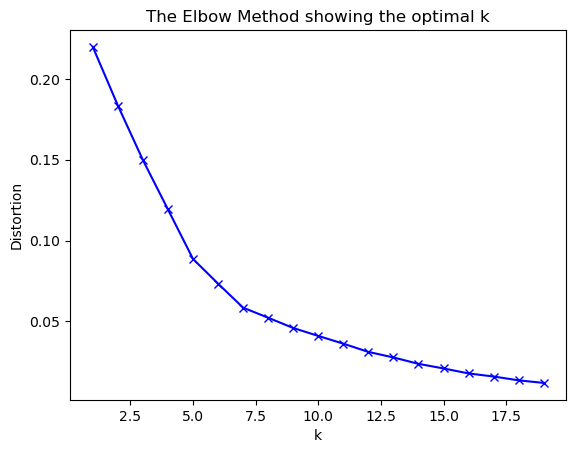

In [25]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(lnd_grouped_clustering)
    #kmeanModel.fit(lnd_grouped_clustering)
    distortions.append(sum(np.min(cdist(lnd_grouped_clustering, kmeanModel.cluster_centers_, 'sqeuclidean'), axis=1)) / lnd_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

I have opted to experiment with sqeuclidean (k=8, Dist=0.05) and cosine (k=11, Dist=0.14) as it gives a high enough k and low enough distortion. Since London had 32 Boroughs my intuition tells me that a k higher than 5 would be a better fit.

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [26]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lnd_merged = lnd_venues_new

# merge lnd_grouped with lnd_data to add latitude/longitude for each neighborhood
lnd_merged = lnd_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

lnd_merged.head() # check the last columns!


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5607,-0.1557,Bistro Laz,51.561333,-0.150528,Mediterranean Restaurant,1,Mediterranean Restaurant,Italian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant
1,Barking and Dagenham,51.5607,-0.1557,Al Parco,51.561356,-0.150680,Italian Restaurant,1,Mediterranean Restaurant,Italian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant
2,Barking and Dagenham,51.5607,-0.1557,Carob Tree,51.561377,-0.150580,Mediterranean Restaurant,1,Mediterranean Restaurant,Italian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant
3,Bexley,51.4549,-0.1505,The Georgian,51.452242,-0.147677,Caucasian Restaurant,7,Mexican Restaurant,Italian Restaurant,Indian Restaurant,Caucasian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
4,Bexley,51.4549,-0.1505,La Baita,51.458228,-0.148801,Italian Restaurant,7,Mexican Restaurant,Italian Restaurant,Indian Restaurant,Caucasian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant


Time to visualise!

In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lnd_merged['Venue Latitude'], lnd_merged['Venue Longitude'], lnd_merged['Neighborhood'], lnd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 3.2.2 Cluster Examination

### - Cluster 0

In [28]:
lnd_merged.loc[lnd_merged['Cluster Labels'] == 0, lnd_merged.columns[[1] + list(range(5, lnd_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
143,51.5441,-0.478547,Brazilian Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant
144,51.5441,-0.476534,Portuguese Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant
145,51.5441,-0.476956,Italian Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant
146,51.5441,-0.476456,Asian Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant
147,51.5441,-0.473764,Fast Food Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant
148,51.5441,-0.480567,Indian Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant
149,51.5441,-0.479845,Italian Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant
150,51.5441,-0.480455,Italian Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant
151,51.5441,-0.474909,Italian Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant
152,51.5441,-0.477093,Fast Food Restaurant,0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Brazilian Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Kebab Restaurant


In [29]:
lnd_merged.loc[lnd_merged['Cluster Labels'] == 1, lnd_merged.columns[[1] + list(range(5, lnd_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,51.5607,-0.150528,Mediterranean Restaurant,1,Mediterranean Restaurant,Italian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant
1,51.5607,-0.150680,Italian Restaurant,1,Mediterranean Restaurant,Italian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant
2,51.5607,-0.150580,Mediterranean Restaurant,1,Mediterranean Restaurant,Italian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant


In [30]:
lnd_merged.loc[lnd_merged['Cluster Labels'] == 2, lnd_merged.columns[[1] + list(range(5, lnd_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
99,51.4892,-0.061858,Vietnamese Restaurant,2,Vietnamese Restaurant,Latin American Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant,French Restaurant


In [31]:
lnd_merged.loc[lnd_merged['Cluster Labels'] == 3, lnd_merged.columns[[1] + list(range(5, lnd_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
241,51.5077,-0.052521,Italian Restaurant,3,Italian Restaurant,Vietnamese Restaurant,Latin American Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant,French Restaurant
302,51.5099,-0.006362,Italian Restaurant,3,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant
303,51.5099,-0.011738,Chinese Restaurant,3,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant
304,51.5099,-0.005449,Italian Restaurant,3,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant


In [32]:
lnd_merged.loc[lnd_merged['Cluster Labels'] == 4, lnd_merged.columns[[1] + list(range(5, lnd_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
305,51.5908,-0.017259,Vegetarian / Vegan Restaurant,4,Vegetarian / Vegan Restaurant,English Restaurant,Korean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant


In [33]:
lnd_merged.loc[lnd_merged['Cluster Labels'] == 5, lnd_merged.columns[[1] + list(range(5, lnd_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
142,51.5898,-0.332211,Indian Restaurant,5,Indian Restaurant,Vietnamese Restaurant,Latin American Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indian Chinese Restaurant,Greek Restaurant,German Restaurant,French Restaurant


In [34]:
lnd_merged.loc[lnd_merged['Cluster Labels'] == 6, lnd_merged.columns[[1] + list(range(5, lnd_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
93,51.6538,-0.080654,Turkish Restaurant,6,Turkish Restaurant,Italian Restaurant,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
94,51.6538,-0.081041,Portuguese Restaurant,6,Turkish Restaurant,Italian Restaurant,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
95,51.6538,-0.080456,Turkish Restaurant,6,Turkish Restaurant,Italian Restaurant,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
96,51.6538,-0.080651,Indian Restaurant,6,Turkish Restaurant,Italian Restaurant,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
97,51.6538,-0.081240,Italian Restaurant,6,Turkish Restaurant,Italian Restaurant,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
98,51.6538,-0.082952,Fast Food Restaurant,6,Turkish Restaurant,Italian Restaurant,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
135,51.6000,-0.110623,Indian Restaurant,6,Fast Food Restaurant,Turkish Restaurant,Italian Restaurant,Mediterranean Restaurant,Indian Restaurant,Portuguese Restaurant,Vietnamese Restaurant,English Restaurant,Japanese Restaurant,Indian Chinese Restaurant
136,51.6000,-0.109100,Mediterranean Restaurant,6,Fast Food Restaurant,Turkish Restaurant,Italian Restaurant,Mediterranean Restaurant,Indian Restaurant,Portuguese Restaurant,Vietnamese Restaurant,English Restaurant,Japanese Restaurant,Indian Chinese Restaurant
137,51.6000,-0.108921,Turkish Restaurant,6,Fast Food Restaurant,Turkish Restaurant,Italian Restaurant,Mediterranean Restaurant,Indian Restaurant,Portuguese Restaurant,Vietnamese Restaurant,English Restaurant,Japanese Restaurant,Indian Chinese Restaurant
138,51.6000,-0.108750,Portuguese Restaurant,6,Fast Food Restaurant,Turkish Restaurant,Italian Restaurant,Mediterranean Restaurant,Indian Restaurant,Portuguese Restaurant,Vietnamese Restaurant,English Restaurant,Japanese Restaurant,Indian Chinese Restaurant


In [35]:
lnd_merged.loc[lnd_merged['Cluster Labels'] == 7, lnd_merged.columns[[1] + list(range(5, lnd_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,51.4549,-0.147677,Caucasian Restaurant,7,Mexican Restaurant,Italian Restaurant,Indian Restaurant,Caucasian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
4,51.4549,-0.148801,Italian Restaurant,7,Mexican Restaurant,Italian Restaurant,Indian Restaurant,Caucasian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
5,51.4549,-0.147465,Indian Restaurant,7,Mexican Restaurant,Italian Restaurant,Indian Restaurant,Caucasian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
6,51.4549,-0.145160,Mexican Restaurant,7,Mexican Restaurant,Italian Restaurant,Indian Restaurant,Caucasian Restaurant,Vietnamese Restaurant,English Restaurant,Kebab Restaurant,Japanese Restaurant,Indian Chinese Restaurant,Greek Restaurant
7,51.5588,-0.279610,Restaurant,7,American Restaurant,Italian Restaurant,Indian Restaurant,Restaurant,Brazilian Restaurant,English Restaurant,Seafood Restaurant,Latin American Restaurant,Thai Restaurant,Asian Restaurant
8,51.5588,-0.281572,Indian Restaurant,7,American Restaurant,Italian Restaurant,Indian Restaurant,Restaurant,Brazilian Restaurant,English Restaurant,Seafood Restaurant,Latin American Restaurant,Thai Restaurant,Asian Restaurant
9,51.5588,-0.283967,Latin American Restaurant,7,American Restaurant,Italian Restaurant,Indian Restaurant,Restaurant,Brazilian Restaurant,English Restaurant,Seafood Restaurant,Latin American Restaurant,Thai Restaurant,Asian Restaurant
10,51.5588,-0.283224,Asian Restaurant,7,American Restaurant,Italian Restaurant,Indian Restaurant,Restaurant,Brazilian Restaurant,English Restaurant,Seafood Restaurant,Latin American Restaurant,Thai Restaurant,Asian Restaurant
11,51.5588,-0.283913,American Restaurant,7,American Restaurant,Italian Restaurant,Indian Restaurant,Restaurant,Brazilian Restaurant,English Restaurant,Seafood Restaurant,Latin American Restaurant,Thai Restaurant,Asian Restaurant
12,51.5588,-0.281986,American Restaurant,7,American Restaurant,Italian Restaurant,Indian Restaurant,Restaurant,Brazilian Restaurant,English Restaurant,Seafood Restaurant,Latin American Restaurant,Thai Restaurant,Asian Restaurant


## 3.3 Choropleth Mapping Boroughs by Restaurant Category

# Choropleth Maps <a id="8"></a>

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/2000_census_population_density_map_by_state.png" width = 600> 

Here I will conduct exploratory analysis even more creatively by running choropleth maps over the London Boroughs by different top restaurant categories to see which areas are "hottest" for what cuisine. 

Then, I will try and do the same for opening hours (IF I have enough calls left to make to the API since these are Premium Calls). This should hopefully indicate which restaurants are still operating during the coronavirus lockdown - An indication of what cuisines are in demand enough for the restaurants to maintain operations. Correlation does NOT equal causation.. but its reasonable to assume that if business are open for trade that there is demand there, its economics 101 my good sir!

### 3.3.1 Marker Clustering

The clusters look a bit congested and its not the best data viz. So to remedy this we're going to group the markers into different clusters. Each cluster is then represented by the number of restaurants in each neighborhood. These clusters can be thought of as pockets of London which you can then analyze separately.

To implement this, we start off by instantiating a *MarkerCluster* object and adding all the data points in the dataframe to this object.

In [36]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
map_lnd = folium.Map(location = [latitude, longitude], zoom_start = 10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_lnd)

# add markers to map
for lat, lng, rest in zip(lnd_venues_new['Venue Latitude'], lnd_venues_new['Venue Longitude'], lnd_venues_new['Venue Category']):
    label = '{}'.format(rest)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
         icon=None,
        popup=label,
    ).add_to(incidents)
        
map_lnd

### 3.3.2 GeoJSON with Boundary Polygons

In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a map of good old London, we want a GeoJSON that defines the boundaries of all London Boroughs. Basically, this is a set of coordinates that outline the boundary of each borough to form a polygon.

In [51]:
# download countries geojson file
!wget --quiet https://earthworks.stanford.edu/download/file/stanford-wj438mh2295-geojson.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [52]:
lnd_geo = r'stanford-wj438mh2295-geojson.json' # geojson file

# create a plain world map
lnd_map = folium.Map(location=[latitude, longitude], zoom_start=2, tiles='Mapbox Bright')

### 3.3.3 Data Cleaning

We will need the normalised dataframe from earlier which has the mean frequency of each restaurant per Neighborhood, as this is what we will use to generate choropleth maps for different cuisines.

In [53]:
lnd_venues_new.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,-0.1557,Bistro Laz,51.561333,-0.150528,Mediterranean Restaurant
1,Barking and Dagenham,51.5607,-0.1557,Al Parco,51.561356,-0.150680,Italian Restaurant
2,Barking and Dagenham,51.5607,-0.1557,Carob Tree,51.561377,-0.150580,Mediterranean Restaurant
3,Bexley,51.4549,-0.1505,The Georgian,51.452242,-0.147677,Caucasian Restaurant
4,Bexley,51.4549,-0.1505,La Baita,51.458228,-0.148801,Italian Restaurant


In [54]:
lnd_grouped['Total'] = lnd_grouped.sum(axis=1)
lnd_grouped.head

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Total
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
1,Bexley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
2,Brent,0.000000,0.153846,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.153846,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,3.0
3,Camden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,3.0
4,City of London,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.037037,0.000000,0.037037,0.037037,0.000000,0.111111,0.000000,0.000000,0.000000,0.074074,0.111111,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.074074,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.037037,0.074074,0.000000,0.000000,0.00,0.000000,0.037037,0.000000,0.000000,0.037037,0.000000,0.037037,0.000000,0.074074,3.0
5,Croydon,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.071429,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.00,0.071429,0.071429,0.000000,0.000000,0.071429,0.000000,0.0

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1. geo_data, which is the GeoJSON file.
2. data, which is the dataframe containing the data.
3. columns, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4. key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the Borough name, since the Boroughs are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

We need to check how the data in the geojson file is formatted to make sure we know what to use the correct key_on

In [ ]:
with open('stanford-wj438mh2295-geojson.json') as json_data:
    lnd_data = json.load(json_data)
#lnd_data #commented out, as this provides a massive long list of the UK polygon coordinates.

The geojson shows that we need the key_on set to feature.properties.name_2. We also see that the geojson name_2 labels City of London as 'London', so we must rename this in our dataframe so that the records match.

In [69]:
lnd_grouped = lnd_grouped.replace(to_replace ="City of London", 
                 value ="London")
lnd_grouped.head(5)

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Total
0,Barking and Dagenham,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.0,0.000000,0.666667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,3.0
1,Bexley,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.250000,0.250000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.250000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,3.0
2,Brent,0.0,0.153846,0.0,0.076923,0.0,0.076923,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.076923,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.153846,0.153846,0.0,0.0,0.0,0.076923,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.076923,0.000000,0.076923,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.076923,0.000000,0.000000,0.0,0.000000,3.0
3,Camden,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.083333,0.000000,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.166667,0.0,0.0,0.0,0.000000,0.0,0.083333,0.000000,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.0,0.083333,0.0,0.083333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.083333,0.083333,0.0,0.000000,0.083333,0.000000,0.0,0.000000,3.0
4,London,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.037037,0.0,0.037037,0.037037,0.0,0.111111,0.0,0.000000,0.0,0.074074,0.111111,0.0,0.0,0.0,0.037037,0.0,0.000000,0.000000,0.037037,0.0,0.074074,0.037037,0.0,0.0,0.0,0.000000,0.0,0.111111,0.037037,0.074074,0.0,0.0,0.0,0.0,0.037037,0.000000,0.0,0.037037,0.000000,0.037037,0.0,0.074074,3.0


### 3.3.4 Mapping the Top Restaurants in London

Now lets get the Top 12 restaurants to generate choropleth maps from, excluding 'Restaurant' as it is too generic. 

In [99]:
top12 = lnd_venues_new.groupby('Venue Category').count().sort_values(by='Neighborhood', ascending=False)
top12.head(6)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Italian Restaurant,53,53,53,53,53,53
Indian Restaurant,30,30,30,30,30,30
Restaurant,17,17,17,17,17,17
Sushi Restaurant,14,14,14,14,14,14
Portuguese Restaurant,14,14,14,14,14,14
Fast Food Restaurant,14,14,14,14,14,14


In [106]:
lnd_map = folium.Map(width=1100,height=680, location = [latitude, longitude], zoom_start = 10.4)
lnd_map.choropleth(
    geo_data=lnd_geo,
    data=lnd_grouped,
    columns=['Neighborhood', 'Italian Restaurant'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Italian Restaurant Density in Boroughs of London'
)

# display map
#lnd_map

In [103]:
lnd_map = folium.Map(width=1100,height=680, location = [latitude, longitude], zoom_start = 10.4)
lnd_map.choropleth(
    geo_data=lnd_geo,
    data=lnd_grouped,
    columns=['Neighborhood', 'Indian Restaurant'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Indian Restaurant Density in Boroughs of London'
)

# display map
#lnd_map

In [102]:
lnd_map = folium.Map(width=1100,height=680, location = [latitude, longitude], zoom_start = 10.4)
lnd_map.choropleth(
    geo_data=lnd_geo,
    data=lnd_grouped,
    columns=['Neighborhood', 'Sushi Restaurant'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Sushi Restaurant Density in Boroughs of London'
)

# display map
#lnd_map

In [101]:
lnd_map = folium.Map(width=1100,height=680, location = [latitude, longitude], zoom_start = 10.4)
lnd_map.choropleth(
    geo_data=lnd_geo,
    data=lnd_grouped,
    columns=['Neighborhood', 'Portuguese Restaurant'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Portuguese Restaurant Density in Boroughs of London'
)

# display map
#lnd_map

In [100]:
lnd_map = folium.Map(width=1100,height=680, location = [latitude, longitude], zoom_start = 10.4)
lnd_map.choropleth(
    geo_data=lnd_geo,
    data=lnd_grouped,
    columns=['Neighborhood', 'Fast Food Restaurant'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Fast Food Restaurant Density in Boroughs of London'
)

# display map
#lnd_map

## 3.4 Conclusion

The rate limit to the FS API has left some Boroughs without data, which means they are missing from the choropleth maps. The geojson also doesnt split Barnet and Enfield. Hours is a Premium call it is out of scope to generate choropleth maps of restaurants trading under lockdown. 

The top most popular restaurants that I would recommend, along with the hotspot for that type of food would be an Italian in Newham, an Indian in Harrow, a Sushi place in Westminster, a Portuguese Restaurant in Sutton, or a Fast Food joint in Merton or Haringey. 

The next step would be to use the estate agent API to make calls for commercial properties that are on the market in those areas for the client, but this is out of scope.